# INFO7390 Spring'24
## HeartFailurePrediction&Analytics
### Team 12 - MediAI Innovators

# Problem Statement :

With a multitude of medical data available and the growth of Data Science, a slew of businesses are taking on the issue of developing indicators for diseases that may be transmitted! Cardiovascular diseases (CVDs) are the leading cause of death worldwide, killing an estimated 17.9 million people each year and accounting for 31% of all deaths. CVDs commonly induce heart failure. People who have cardiovascular disease or are at high cardiovascular risk (due to the existence of one or more risk factors such as hypertension, diabetes, hyperlipidemia, or pre-existing disease) require early detection and therapy, and a machine learning model can be quite useful. In this approach, we strive to automate another natural problem in order to counter it and move on to the next difficulty using AI techniques!


# Aim :
To provide a strong data science solution that uses machine learning algorithms to predict the likelihood of heart failure in patients based on clinical and demographic characteristics.

We seek to compare and assess the effectiveness of six different classifiers, including Decision Tree, Random Forest, Gradient Boosting Classifier, Logistic Regression, K-Nearest Neighbors, and XG Boost, in properly predicting heart failure. We hope to determine the most effective classifier or combination of classifiers for heart failure prediction by doing this thorough investigation.

Recognizing the vital need of early detection and intervention in heart failure management contributes to our thorough grasp of the problem domain. By demonstrating the importance of our solution, we hope to contribute to the advancement of healthcare practices, allowing healthcare professionals to proactively identify individuals at high risk of heart failure and provide timely interventions to improve patient outcomes and quality of life.


### Dataset Attributes :

1. Age : age of the patient [years]
2. Sex : sex of the patient [M: Male, F: Female]
3. ChestPainType : chest pain type [TA: Typical Angina, ATA: Atypical Angina, NAP: Non-Anginal Pain, ASY: Asymptomatic]
4. RestingBP : resting blood pressure [mm Hg]
5. Cholesterol : serum cholesterol [mm/dl]
6. FastingBS : fasting blood sugar [1: if FastingBS > 120 mg/dl, 0: otherwise]
7. RestingECG : resting electrocardiogram results [Normal: Normal, ST: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV), LVH: showing probable or definite left ventricular hypertrophy by Estes' criteria]
8. MaxHR : maximum heart rate achieved [Numeric value between 60 and 202]
9. ExerciseAngina : exercise-induced angina [Y: Yes, N: No]
10. Oldpeak : oldpeak = ST [Numeric value measured in depression]
11. ST_Slope : the slope of the peak exercise ST segment [Up: upsloping, Flat: flat, Down: downsloping]
12. HeartDisease : output class [1: heart disease, 0: Normal]

###Notebook Contents :
1. Dataset Information
2. Exploratory Data Analysis (EDA)
3. Summary of EDA
4. Modeling
5. Conclusion



### What you will learn :
1. Data Visualization
2. Data Scaling
3. Statistical Tests for Feature Engineering
4. Modeling and visualization of results for algorithms

In [1]:
## Uncomment and install if not installed on system

!pip install ydata-profiling

# After installing please restart the kernal

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 357.9/357.9 kB 1.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 104.8/104.8 kB 5.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 686.1/686.1 kB 12.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 293.3/293.3 kB 11.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 296.5/296.5 kB 17.7 MB/s eta 0:00:00
  Created wheel for htmlmin: filename=htmlmin-0.1.12-py3-none-any.whl size=27080 sha256=8b76f1962fb15ed758ed48ffc3fc5c9700afb56247366d95f4603263f1637bcb
  Stored in directory: /root/.cache/pip/wheels/dd/91/29/a79cecb328d01739e64017b6fb9a1ab9d8cb1853098ec5966d
Successfully built htmlmin
  Attempting uninstall: seaborn
    Found existing installation: seaborn 0.13.1
    Uninstalling seaborn-0.13.1:
      Successfully uninstalled seaborn-0.13.1


### Import Libraries

In [2]:

### Importing the required packages

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
from ydata_profiling import ProfileReport

# ---------------------------------------------------------
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import LabelEncoder


# ---------------------------------------------------------
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, f1_score,confusion_matrix, recall_score, precision_score, classification_report
from sklearn.metrics import average_precision_score
from sklearn.metrics import roc_curve, auc

# ---------------------------------------------------------
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import learning_curve

# ---------------------------------------------------------
from mlxtend.feature_selection import SequentialFeatureSelector as SFS
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import ExtraTreesClassifier, GradientBoostingClassifier, StackingClassifier, RandomForestClassifier

import warnings
warnings.filterwarnings("ignore")

### EDA
Exploratory Data Analysis (EDA) is an important first phase in the data analysis process that entails studying and comprehending the properties, patterns, and correlations contained within a dataset. Its major purpose is to gather insights, detect patterns, and identify probable abnormalities or trends in the data before using more advanced analysis tools.


In [3]:
# Reading the dataset
df = pd.read_csv("/content/heart.csv")
df.head()

Age Sex ChestPainType  RestingBP  Cholesterol  FastingBS RestingECG  MaxHR  \
0   40   M           ATA        140          289          0     Normal    172   
1   49   F           NAP        160          180          0     Normal    156   
2   37   M           ATA        130          283          0         ST     98   
3   48   F           ASY        138          214          0     Normal    108   
4   54   M           NAP        150          195          0     Normal    122   

  ExerciseAngina  Oldpeak ST_Slope  HeartDisease  
0              N      0.0       Up             0  
1              N      1.0     Flat             1  
2              N      0.0       Up             0  
3              Y      1.5     Flat             1  
4              N      0.0       Up             0

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
# Checking the shape
df.shape

(918, 12)

In [6]:
# Displaying the column names
df.columns

Index(['Age', 'Sex', 'ChestPainType', 'RestingBP', 'Cholesterol', 'FastingBS',
       'RestingECG', 'MaxHR', 'ExerciseAngina', 'Oldpeak', 'ST_Slope',
       'HeartDisease'],
      dtype='object')

In [7]:
# Displaying the information about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


In [8]:
# Displaying the data types
df.dtypes

Age                 int64
Sex                object
ChestPainType      object
RestingBP           int64
Cholesterol         int64
FastingBS           int64
RestingECG         object
MaxHR               int64
ExerciseAngina     object
Oldpeak           float64
ST_Slope           object
HeartDisease        int64
dtype: object

Categorical Features : Sex ChestPainType FastingBS RestingECG ExerciseAngina ST_Slope HeartDisease

Numerical Features : Age RestingBP Cholesterol MaxHR Oldpeak

In [9]:
# Generates a summary of numeric columns
df.describe().T

count        mean         std   min     25%    50%    75%    max
Age           918.0   53.510893    9.432617  28.0   47.00   54.0   60.0   77.0
RestingBP     918.0  132.396514   18.514154   0.0  120.00  130.0  140.0  200.0
Cholesterol   918.0  198.799564  109.384145   0.0  173.25  223.0  267.0  603.0
FastingBS     918.0    0.233115    0.423046   0.0    0.00    0.0    0.0    1.0
MaxHR         918.0  136.809368   25.460334  60.0  120.00  138.0  156.0  202.0
Oldpeak       918.0    0.887364    1.066570  -2.6    0.00    0.6    1.5    6.2
HeartDisease  918.0    0.553377    0.497414   0.0    0.00    1.0    1.0    1.0

In [10]:
#Generating a Pandas Profiling Report for DataFrame 'df'
profile = df.profile_report(title='Pandas Profiling Report')

In [11]:
profile.to_notebook_iframe()

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [12]:
profile.to_file(output_file="pandas_profiling1.html")

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

In [13]:
profile.to_file(output_file="pandas_profiling2.json")

Render JSON:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

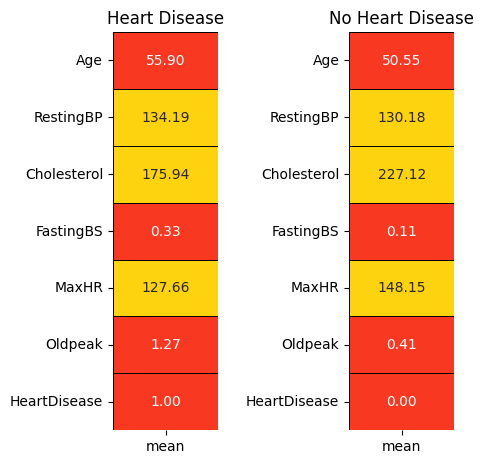

In [14]:
#Mean values of all the features for cases of heart diseases and non-heart diseases.
yes = df[df['HeartDisease'] == 1].describe().T
no = df[df['HeartDisease'] == 0].describe().T
colors = ['#F93822','#FDD20E']

fig,ax = plt.subplots(nrows = 1,ncols = 2,figsize = (5,5))
plt.subplot(1,2,1)
sns.heatmap(yes[['mean']],annot = True,cmap = colors,linewidths = 0.4,linecolor = 'black',cbar = False,fmt = '.2f',)
plt.title('Heart Disease');

plt.subplot(1,2,2)
sns.heatmap(no[['mean']],annot = True,cmap = colors,linewidths = 0.4,linecolor = 'black',cbar = False,fmt = '.2f')
plt.title('No Heart Disease');

fig.tight_layout(pad = 2)

Heart Disease Counts:
HeartDisease
1    508
0    410
Name: count, dtype: int64


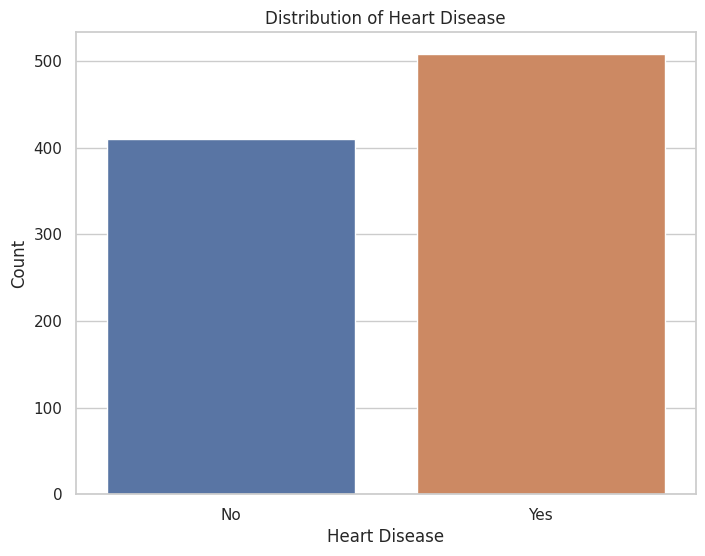

In [15]:
# Count the occurrences of each value in the 'HeartDisease' column
heart_disease_counts = df['HeartDisease'].value_counts()

# Print the count of each value in 'HeartDisease' column
print("Heart Disease Counts:")
print(heart_disease_counts)

# Create a count plot using Seaborn
plt.figure(figsize=(8, 6))
sns.set(style="whitegrid")
sns.countplot(x="HeartDisease", data=df)

plt.title("Distribution of Heart Disease")
plt.xlabel("Heart Disease")
plt.ylabel("Count")
plt.xticks([0, 1], ["No", "Yes"])  # Assuming '0' means No and '1' means Yes
plt.show()

As we can see from the above visual Maximum people suffer from heart disease

In [16]:
# Shows the Distribution of Heat Diseases with respect to male and female
plt.figure(figsize=(8, 6))
fig=px.histogram(df,
                 x="HeartDisease",
                 color="Sex",
                 hover_data=df.columns,
                 title="Distribution of Heart Diseases",
                 barmode="group")
fig.show()

<Figure size 800x600 with 0 Axes>

In [17]:
fig=px.histogram(df,
                 x="ChestPainType",
                 color="Sex",
                 hover_data=df.columns,
                 title="Types of Chest Pain"
                )
fig.show()

In [18]:
#### Checking the Categorical and Numerical Features in our dataset
# Identify categorical features in the DataFrame
categorical_features_mask = df.dtypes == object
final_categorical_features = df.columns[categorical_features_mask].tolist()

# List of numeric features
final_numeric_features = ['Age', 'RestingBP', 'Cholesterol', 'MaxHR', 'Oldpeak']

# Print the final lists of categorical and numeric features
print("Final Categorical Features:")

print(final_categorical_features)
print("\nFinal Numeric Features:")
print(final_numeric_features)


Final Categorical Features:
['Sex', 'ChestPainType', 'RestingECG', 'ExerciseAngina', 'ST_Slope']

Final Numeric Features:
['Age', 'RestingBP', 'Cholesterol', 'MaxHR', 'Oldpeak']


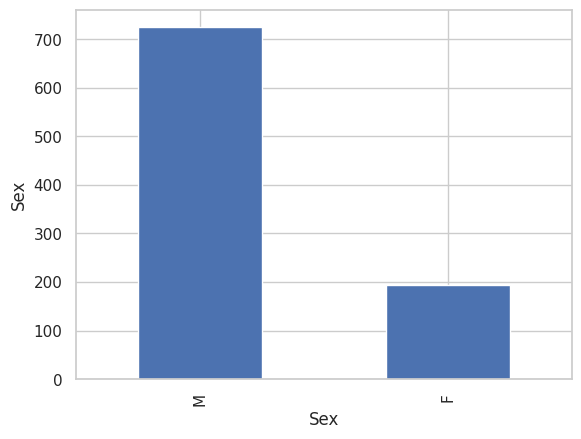

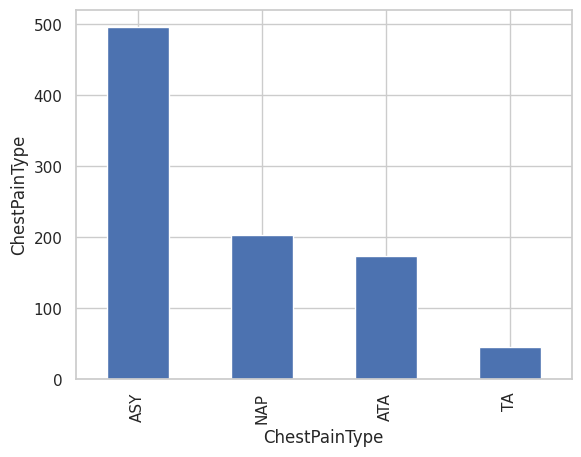

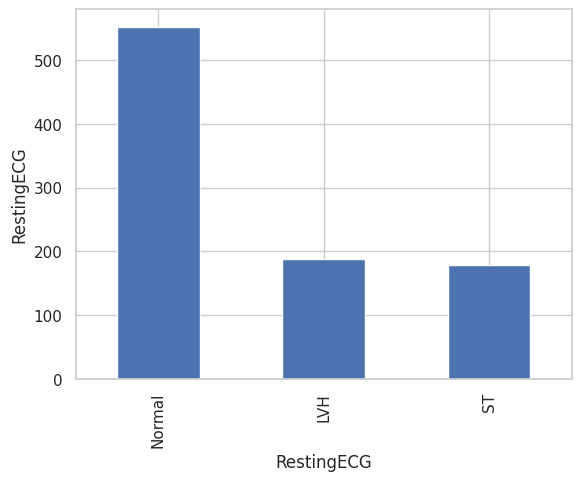

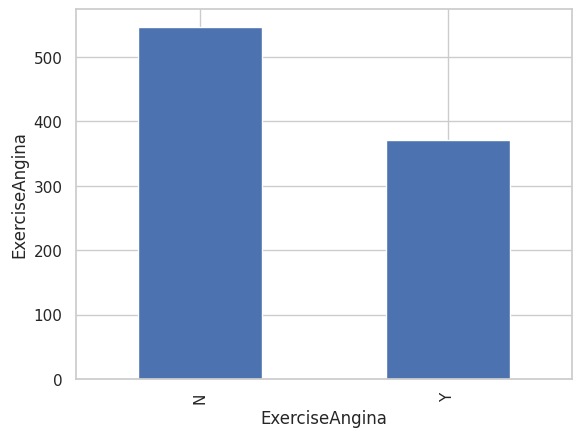

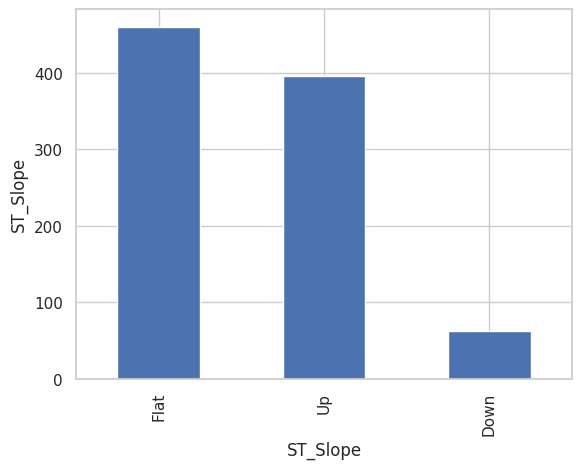

In [19]:
# Iterate through each categorical feature
for i in range(len(final_categorical_features)):
    # Create a bar plot for the current categorical feature
    df[final_categorical_features[i]].value_counts().plot(kind='bar')

    # Rotate x-axis labels vertically for readability
    plt.xticks(rotation='vertical')

    # Set the y-axis label to the current categorical feature
    plt.ylabel(final_categorical_features[i])

    # Display the plot
    plt.show()


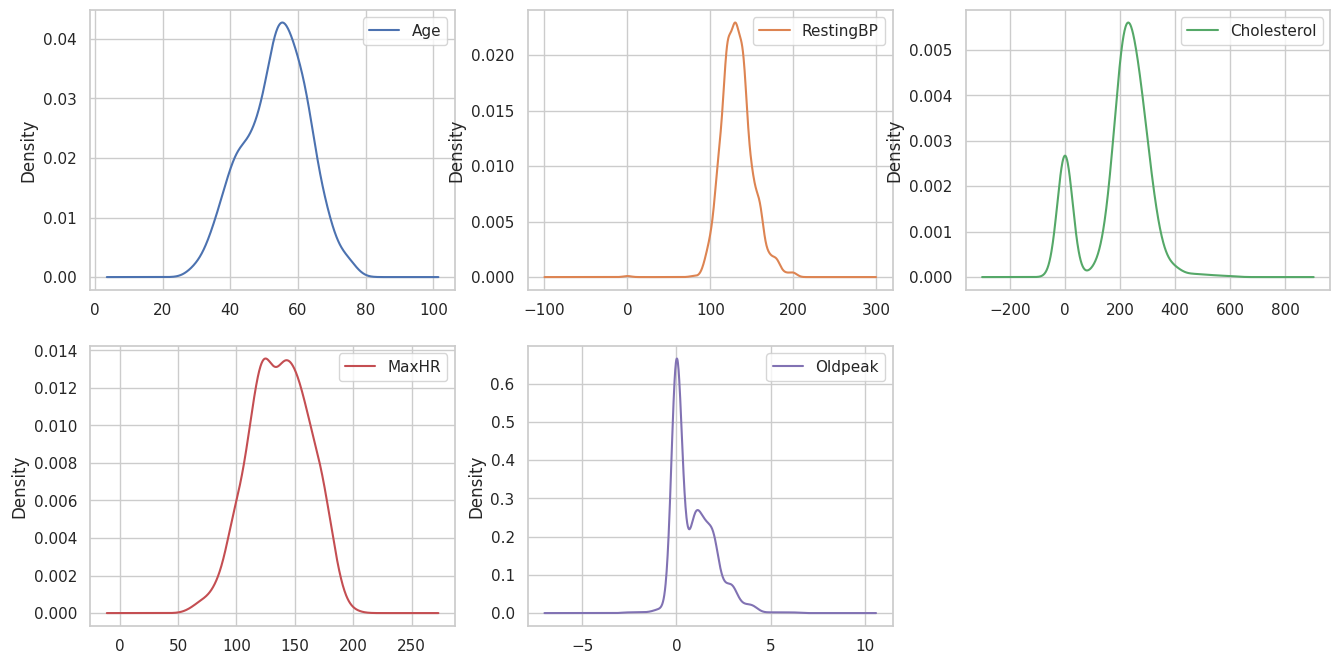

In [20]:
# Create a density plot for each numeric feature
df[final_numeric_features].plot(kind='density', subplots=True, layout=(2,3), sharex=False, figsize= (16,8))
plt.show()

In [21]:
# Assuming df is your DataFrame containing the data
# Drop non-numeric columns
numeric_df = df.select_dtypes(include='number')

# Heatmap of correlation matrix
correlation_matrix = numeric_df.corr()

# Convert correlation matrix values to text annotations
annotations = []
for i, row in enumerate(correlation_matrix.values):
    for j, value in enumerate(row):
        annotations.append(dict(text=f'{value:.2f}', x=j, y=i, font=dict(color='black')))

# Create the correlation plot with annotations
fig = px.imshow(
    correlation_matrix,
    title="Correlation Plot of the Heat Failure Prediction",
    color_continuous_scale="RdBu",
    color_continuous_midpoint=0,
    labels=dict(color="Correlation"),
)

# Add the annotations to the heatmap
fig.update_layout(annotations=annotations)

# Customize the layout for better readability
fig.update_layout(
    xaxis_title="Features",
    yaxis_title="Features",
    xaxis_showticklabels=True,
    yaxis_showticklabels=True
)

# Show the plot
fig.show()


Here we can see Heart Disease has a high negative correlation with "MaxHR" and somewhat negative correlation wiht "Cholesterol", where as here positive correatlation with "Oldpeak","FastingBS" and "RestingBP"

[]

<Figure size 1500x1000 with 0 Axes>

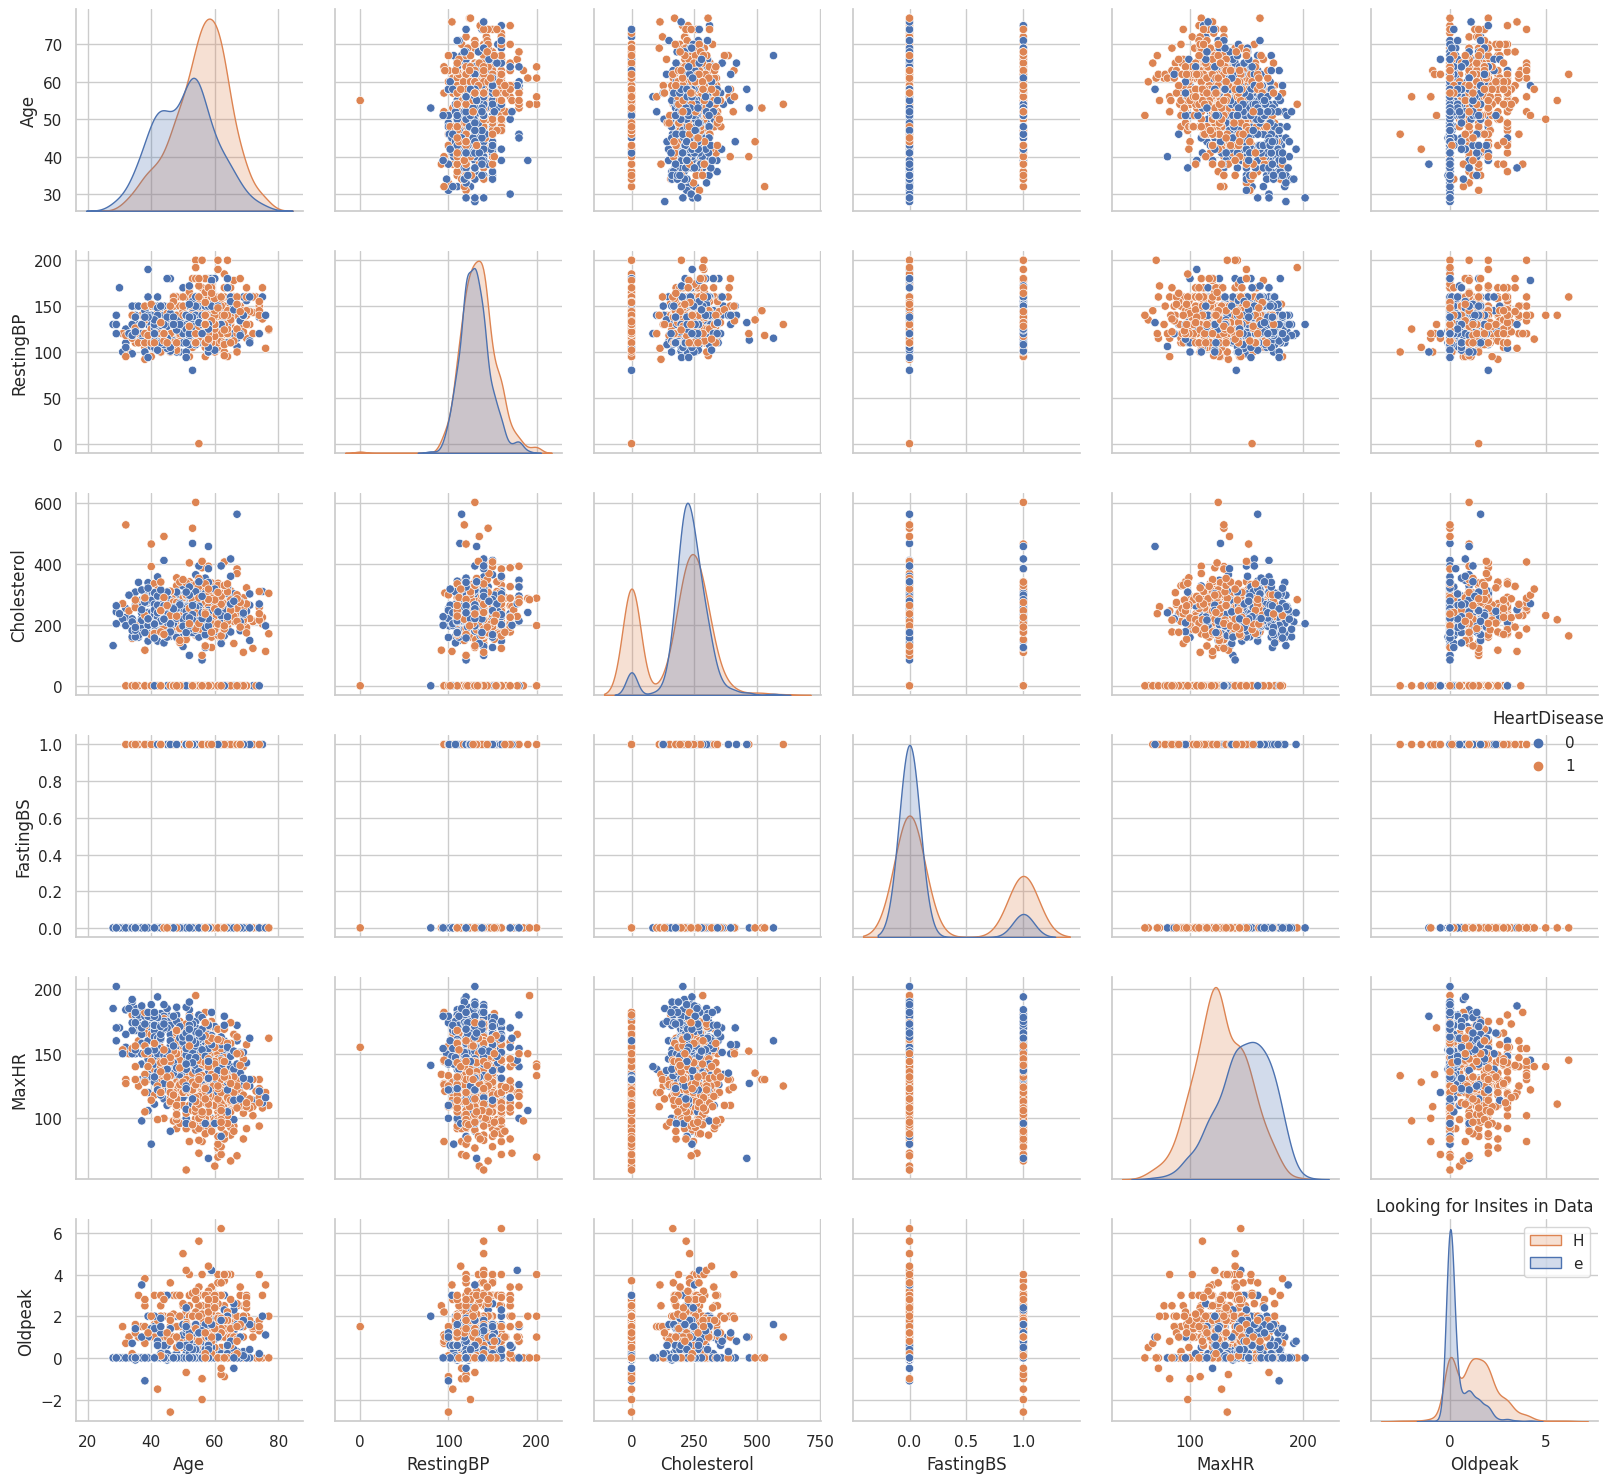

In [22]:
plt.figure(figsize=(15,10))
sns.pairplot(df,hue="HeartDisease")
plt.title("Looking for Insites in Data")
plt.legend("HeartDisease")
plt.tight_layout()
plt.plot()

Now to check the linearity of the variables it is a good practice to plot distribution graph and look for skewness of features. Kernel density estimate (kde) is a quite useful tool for plotting the shape of a distribution.

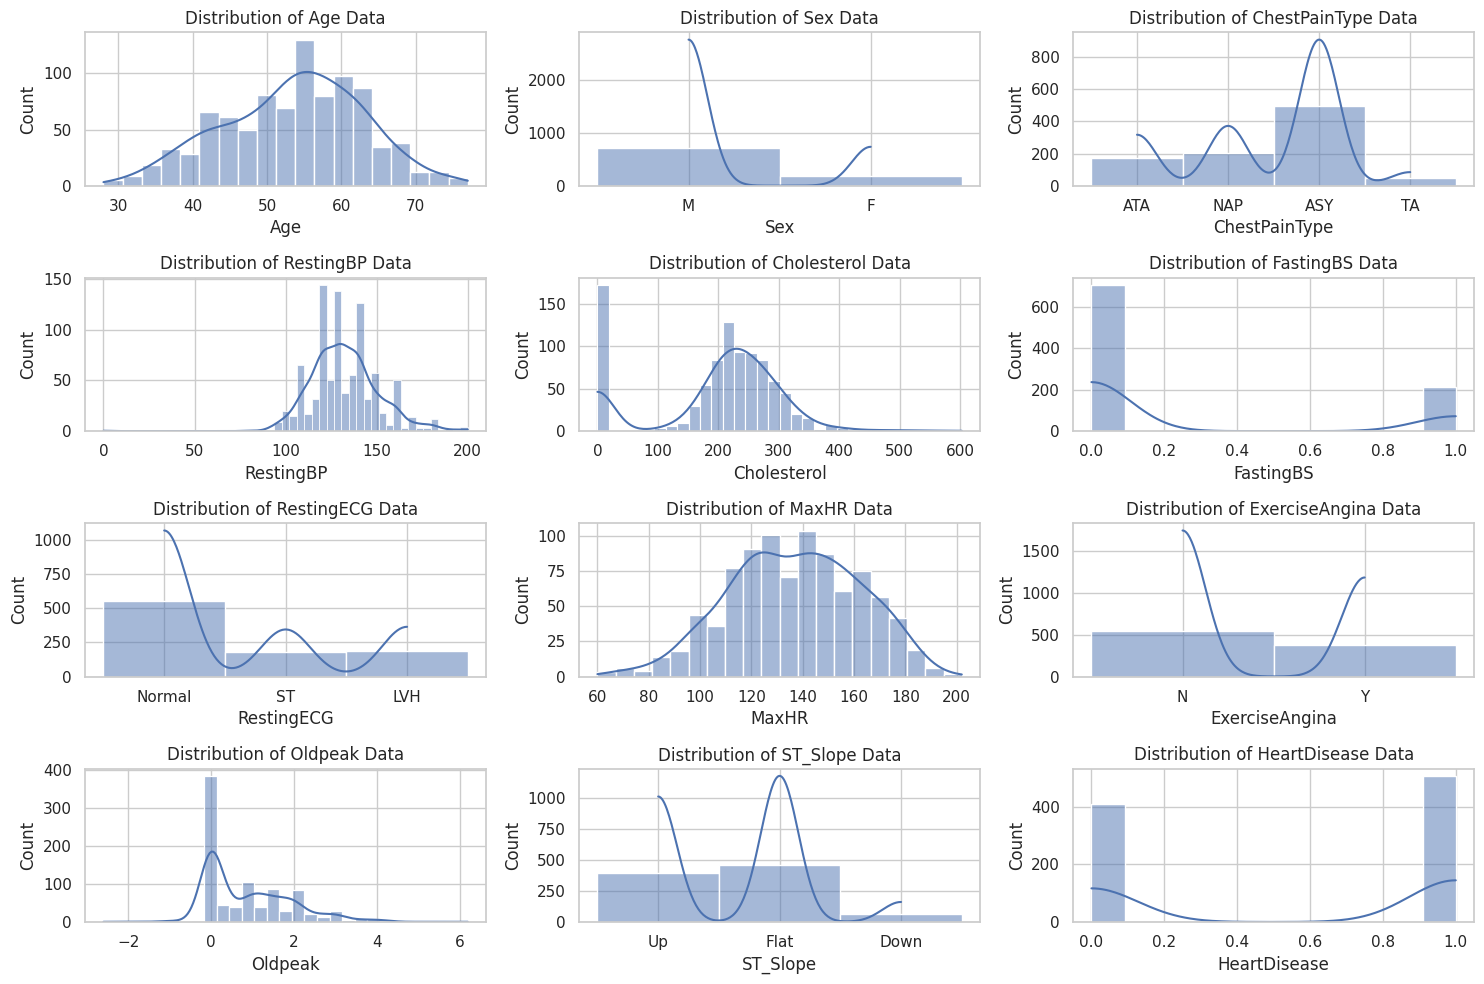

In [23]:
plt.figure(figsize=(15,10))
for i,col in enumerate(df.columns,1):
    plt.subplot(4,3,i)
    plt.title(f"Distribution of {col} Data")
    sns.histplot(df[col],kde=True)
    plt.tight_layout()
    plt.plot()


###Outliers
A box plot (or box-and-whisker plot) shows the distribution of quantitative data in a way that facilitates comparisons between variables.The box shows the quartiles of the dataset while the whiskers extend to show the rest of the distribution.The box plot (a.k.a. box and whisker diagram) is a standardized way of displaying the distribution of data based on the five number summary:

1. Minimum
2. First quartile
3. Median
4. Third quartile
5. Maximum

In the simplest box plot the central rectangle spans the first quartile to the third quartile (the interquartile range or IQR).A segment inside the rectangle shows the median and “whiskers” above and below the box show the locations of the minimum and maximum.

In [24]:
fig = px.box(df,y="Age",x="HeartDisease",title=f"Distrubution of Age")
fig.show()

In [25]:
fig = px.box(df,y="RestingBP",x="HeartDisease",title=f"Distrubution of RestingBP",color="Sex")
fig.show()

In [26]:
fig = px.box(df,y="Cholesterol",x="HeartDisease",title=f"Distrubution of Cholesterol")
fig.show()

In [27]:
fig = px.box(df,y="Oldpeak",x="HeartDisease",title=f"Distrubution of Oldpeak")
fig.show()

In [28]:
fig = px.box(df,y="MaxHR",x="HeartDisease",title=f"Distrubution of MaxHR")
fig.show()

Utilizing Plotly and Bokeh for interactive and dynamic data visualization.

In [29]:
import plotly.express as px
import plotly.graph_objects as go
from bokeh.plotting import figure, show
from bokeh.io import output_notebook



In [30]:
# Interactive scatter plot with tooltips
fig = px.scatter(df, x='Age', y='Cholesterol', color='HeartDisease', hover_data=['Sex', 'RestingBP'])
fig.update_layout(title='Interactive Scatter Plot')
fig.show()

In [31]:
from bokeh.plotting import figure, output_file, show
from bokeh.models import ColumnDataSource, HoverTool
from bokeh.layouts import layout
from bokeh.models import Div, Select
from bokeh.io import output_notebook


# Assuming 'df' is your DataFrame
output_file("scatter_plot.html")

# Create a ColumnDataSource from your DataFrame
source = ColumnDataSource(df)

# Create a figure
p = figure(title="Interactive Scatter Plot", x_axis_label="MaxHR", y_axis_label="Cholesterol")

# Add circles to the plot
p.circle('MaxHR', 'Cholesterol', source=source, size=10, color='blue', alpha=0.5)

# Add a hover tool to display additional information on hover
hover = HoverTool()
hover.tooltips = [
    ("MaxHR", "@MaxHR"),
    ("Cholesterol", "@Cholesterol"),
    ("HeartDisease", "@HeartDisease")
]
p.add_tools(hover)

# Show the plot
show(p)


### Data Pre-processing

Data preprocessing is an integral step in Machine Learning as the quality of data and the useful information that can be derived from it directly affects the ability of our model to learn; therefore, it is extremely important that we preprocess our data before feeding it into our model.

The concepts that I will cover in this article are

1. Handling Null Values
2. Feature Scaling
3. Handling Categorical Variables

In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


In real world dataset we find nulls and we have to handle those nulls to further apply on our model

In [33]:
# Checking null values
df.isnull().sum()

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64

As we can see in our dataset there is no null values

#### Defining Functions

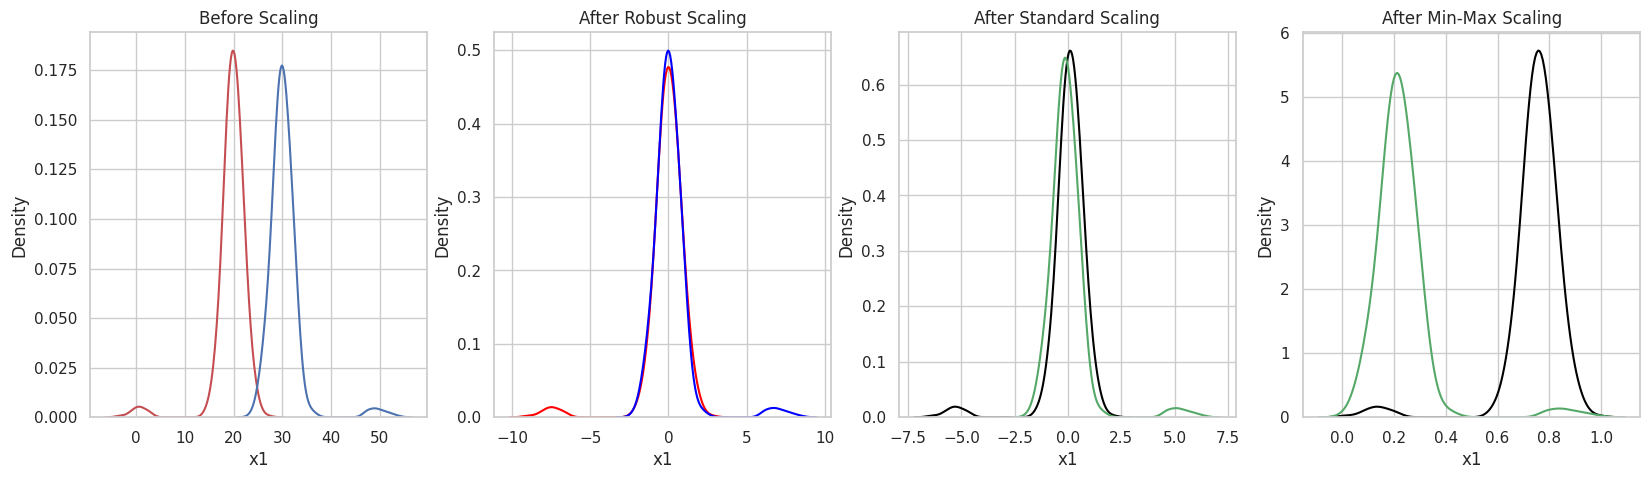

In [34]:
# data
x = pd.DataFrame({
    # Distribution with lower outliers
    'x1': np.concatenate([np.random.normal(20, 2, 1000), np.random.normal(1, 2, 25)]),
    # Distribution with higher outliers
    'x2': np.concatenate([np.random.normal(30, 2, 1000), np.random.normal(50, 2, 25)]),
})
np.random.normal

scaler = preprocessing.RobustScaler()
robust_df = scaler.fit_transform(x)
robust_df = pd.DataFrame(robust_df, columns =['x1', 'x2'])

scaler = preprocessing.StandardScaler()
standard_df = scaler.fit_transform(x)
standard_df = pd.DataFrame(standard_df, columns =['x1', 'x2'])

scaler = preprocessing.MinMaxScaler()
minmax_df = scaler.fit_transform(x)
minmax_df = pd.DataFrame(minmax_df, columns =['x1', 'x2'])

fig, (ax1, ax2, ax3, ax4) = plt.subplots(ncols = 4, figsize =(20, 5))
ax1.set_title('Before Scaling')

sns.kdeplot(x['x1'], ax = ax1, color ='r')
sns.kdeplot(x['x2'], ax = ax1, color ='b')
ax2.set_title('After Robust Scaling')

sns.kdeplot(robust_df['x1'], ax = ax2, color ='red')
sns.kdeplot(robust_df['x2'], ax = ax2, color ='blue')
ax3.set_title('After Standard Scaling')

sns.kdeplot(standard_df['x1'], ax = ax3, color ='black')
sns.kdeplot(standard_df['x2'], ax = ax3, color ='g')
ax4.set_title('After Min-Max Scaling')

sns.kdeplot(minmax_df['x1'], ax = ax4, color ='black')
sns.kdeplot(minmax_df['x2'], ax = ax4, color ='g')
plt.show()

#### Label Encoding

In this dataset we can find some categorical dataset, so we need to convert those to numerical data. For that process we will be using Label Encoding. Label Encoding is a method which assigns a numerical value to its corresponding categorical feature. For eg- in Sex feature - Male will be toggled to 1 and Female will be Toggled to 0.

In [35]:
# Apply label encoding to each categorical feature in the DataFrame
label_encoder = LabelEncoder()
df[final_categorical_features] = df[final_categorical_features].apply(lambda col: label_encoder.fit_transform(col))
df.head(5)

Age  Sex  ChestPainType  RestingBP  Cholesterol  FastingBS  RestingECG  \
0   40    1              1        140          289          0           1   
1   49    0              2        160          180          0           1   
2   37    1              1        130          283          0           2   
3   48    0              0        138          214          0           1   
4   54    1              2        150          195          0           1   

   MaxHR  ExerciseAngina  Oldpeak  ST_Slope  HeartDisease  
0    172               0      0.0         2             0  
1    156               0      1.0         1             1  
2     98               0      0.0         2             0  
3    108               1      1.5         1             1  
4    122               0      0.0         2             0

#### Check for Duplicate Data

Like Null values we also need to check the duplicates in our dataset.

In [36]:
df.loc[df.duplicated()].shape

(0, 12)

As we can see we don't have any duplicates in our dataset

### Train Test Split & Normalization

In [37]:
# Separate the features (x) and the target variable (y)
x = df.drop("HeartDisease", axis = 1)
y = df['HeartDisease']

In [38]:
# Split the data into training and testing sets using train_test_split
# Here we are splitting the data set to 80:20
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state =100 ,stratify=y, test_size = 0.2)
print(y_train.value_counts())

HeartDisease
1    406
0    328
Name: count, dtype: int64


### Feature Scaling

MinMaxScaler is a data preprocessing technique used in machine learning and data analysis to scale numerical features to a specific range. It transforms the data in such a way that it falls within a defined range, usually between 0 and 1.

In [39]:
# Initialize the MinMaxScaler
scale = MinMaxScaler()
# List of columns to be scaled
col = ['Age', 'ChestPainType', 'RestingBP', 'Cholesterol',
       'RestingECG', 'MaxHR', 'Oldpeak', 'ST_Slope']
# Scale columns into training set
x_train[col] = scale.fit_transform(x_train[col])
# Scale columns into test set
x_test[col] = scale.transform(x_test[col])

### Feature Selection

Here we will be using Sequential Feature Selector, which uses the best combination of features that maximizes the model's performance while minimizing overfitting and reducing computational complexity.

In [40]:
# Initialize the Sequential Feature Selector (SFS) with a GradientBoostingClassifier estimator
sfs = SFS(GradientBoostingClassifier(n_estimators=100, random_state=0),
          k_features = 7,
          forward= True,
          floating = False,
          verbose= 2,
          scoring= 'accuracy',
          cv = 4,
          n_jobs= -1).fit(x_train, y_train)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  11 out of  11 | elapsed:    5.0s finished

[2024-04-20 02:16:17] Features: 1/7 -- score: 0.8106364338322642[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    2.7s finished

[2024-04-20 02:16:19] Features: 2/7 -- score: 0.8283366001425516[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 out of   9 | elapsed:    2.5s finished

[2024-04-20 02:16:22] Features: 3/7 -- score: 0.8392358636255642[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done   8 out of   8 | elapsed:    2.8s finished

[2024-04-20 02:16:25] Features: 4/7 -- score: 0.8487690068899976[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done   7 out of   7 | elapsed:    3.6s finished

[202

In [41]:
print("Best features: ",sfs.k_feature_names_)
print("Best score: ",sfs.k_score_)

Best features:  ('Sex', 'ChestPainType', 'Cholesterol', 'FastingBS', 'ExerciseAngina', 'Oldpeak', 'ST_Slope')
Best score:  0.8705749584224282


In [42]:
x_train_new = x_train[['Sex','Cholesterol','FastingBS','RestingECG','ExerciseAngina','Oldpeak','ST_Slope']]
x_test_new = x_test[['Sex','Cholesterol','FastingBS','RestingECG','ExerciseAngina','Oldpeak','ST_Slope']]

## Implementing a classifier to predict heart failure likelihood using machine learning algorithms.

### Decision Tree Classifier

A decision tree is a supervised machine learning algorithm used for both classification and regression tasks. It works by recursively partitioning the dataset into subsets based on feature values, aiming to maximize information gain or minimize impurity at each split. Each leaf node represents a class label or a predicted value, and the path from the root to a leaf describes the decision-making process based on features. Decision trees are intuitive, interpretable, and can handle both categorical and numerical data, but they are prone to overfitting and may not capture complex relationships in the data.

Best Hyperparameters:  {'criterion': 'entropy', 'max_depth': 5, 'min_samples_leaf': 3, 'min_samples_split': 2}
Train set Accuracy (Best Model):  0.8814713896457765
Test set Accuracy (Best Model):  0.8641304347826086
Precision Score (Best Model):  0.9325842696629213
Recall Score (Best Model):  0.8137254901960784
F1-Score (Best Model):  0.869109947643979
ROC AUC (Best Model):  0.8781683405069345

Classification Report (Best Model):
              precision    recall  f1-score   support

           0       0.80      0.93      0.86        82
           1       0.93      0.81      0.87       102

    accuracy                           0.86       184
   macro avg       0.87      0.87      0.86       184
weighted avg       0.87      0.86      0.86       184




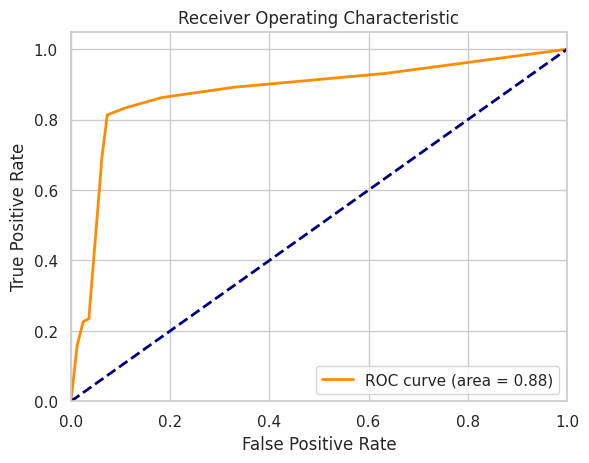

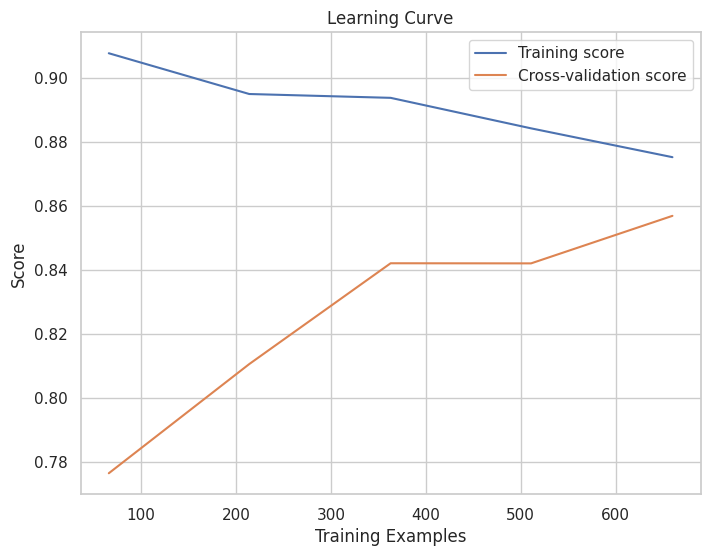

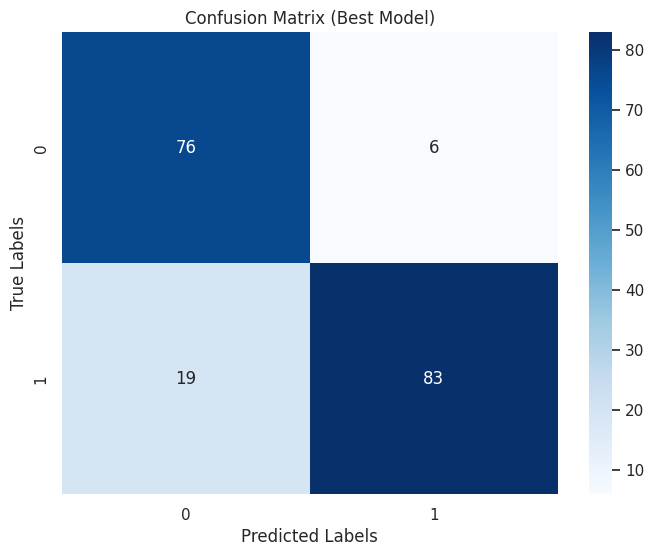

In [43]:
# Define a parameter grid for hyperparameter tuning
param_grid = {
    'max_depth': [3, 5, 7, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 3, 5, 10],
    'criterion': ['gini', 'entropy']
}

# Initialize the Decision Tree Classifier
DT = DecisionTreeClassifier(random_state=0)

# Initialize GridSearchCV
grid_search = GridSearchCV(DT, param_grid, cv=10, scoring='accuracy', n_jobs=-1)

# Perform hyperparameter tuning on the training data
grid_search.fit(x_train_new, y_train)

# Get the best hyperparameters
best_params = grid_search.best_params_

# Initialize Decision Tree Classifier with best hyperparameters
best_DT = DecisionTreeClassifier(**best_params, random_state=0)

# Fit the model with best hyperparameters on the training data
best_DT.fit(x_train_new, y_train)

# Predictions using the best model
y_test_pred_DT = best_DT.predict(x_test_new)
y_train_pred_DT = best_DT.predict(x_train_new)

# Calculate accuracy scores using the best model
test_acc_DT = accuracy_score(y_test, y_test_pred_DT)
train_acc_DT = accuracy_score(y_train, y_train_pred_DT)

# Print the evaluation metrics for the best model
print("Best Hyperparameters: ", best_params)
print("Train set Accuracy (Best Model): ", train_acc_DT)
print("Test set Accuracy (Best Model): ", test_acc_DT)

# Calculate precision, recall, and F1-score for the best model
precision_score_DT = precision_score(y_test, y_test_pred_DT)
recall_score_DT = recall_score(y_test, y_test_pred_DT)
f1_score_DT = f1_score(y_test, y_test_pred_DT)

# Print precision, recall, and F1-score
print("Precision Score (Best Model): ", precision_score_DT)
print("Recall Score (Best Model): ", recall_score_DT)
print("F1-Score (Best Model): ", f1_score_DT)

# Compute ROC curve and ROC area for the best model
y_score_DT = best_DT.predict_proba(x_test_new)[:, 1]
fpr_DT, tpr_DT, _ = roc_curve(y_test, y_score_DT)
roc_auc_DT = auc(fpr_DT, tpr_DT)

# Print ROC AUC for the best model
print("ROC AUC (Best Model): ", roc_auc_DT)

# Print the classification report for the best model
print("\nClassification Report (Best Model):\n%s\n" % classification_report(y_test, y_test_pred_DT))

# Plot ROC curve for the best model
plt.figure()
plt.plot(fpr_DT, tpr_DT, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc_DT)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

# Plot the learning curve for the best model
plt.figure(figsize=(8, 6))
train_sizes, train_scores, test_scores = learning_curve(best_DT, x_train_new, y_train, cv=10, scoring='accuracy')
train_scores_mean = train_scores.mean(axis=1)
test_scores_mean = test_scores.mean(axis=1)
plt.plot(train_sizes, train_scores_mean, label='Training score')
plt.plot(train_sizes, test_scores_mean, label='Cross-validation score')
plt.xlabel("Training Examples")
plt.ylabel("Score")
plt.title("Learning Curve")
plt.legend()
plt.show()

# Plot the confusion matrix for the best model
plt.figure(figsize=(8, 6))
conf_DT = confusion_matrix(y_test, y_test_pred_DT)
sns.heatmap(conf_DT, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix (Best Model)")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()

### Random Forest Classifier

Random Forest is an ensemble learning algorithm in machine learning. It builds multiple decision trees during training and combines their predictions to improve accuracy and mitigate overfitting. Each tree is trained on a random subset of the data and features, reducing bias and variance. Random Forest is effective for classification and regression tasks and is robust against noisy data and outliers.

Best Hyperparameters:  {'criterion': 'gini', 'max_depth': 5, 'min_samples_leaf': 5, 'min_samples_split': 2, 'n_estimators': 50}
Train set Accuracy (Best Model):  0.8787465940054496
Test set Accuracy (Best Model):  0.8641304347826086
Precision Score (Best Model):  0.8666666666666667
Recall Score (Best Model):  0.8921568627450981
F1-Score (Best Model):  0.8792270531400966
ROC AUC (Best Model):  0.917144906743185

Classification Report (Best Model):
              precision    recall  f1-score   support

           0       0.86      0.83      0.84        82
           1       0.87      0.89      0.88       102

    accuracy                           0.86       184
   macro avg       0.86      0.86      0.86       184
weighted avg       0.86      0.86      0.86       184




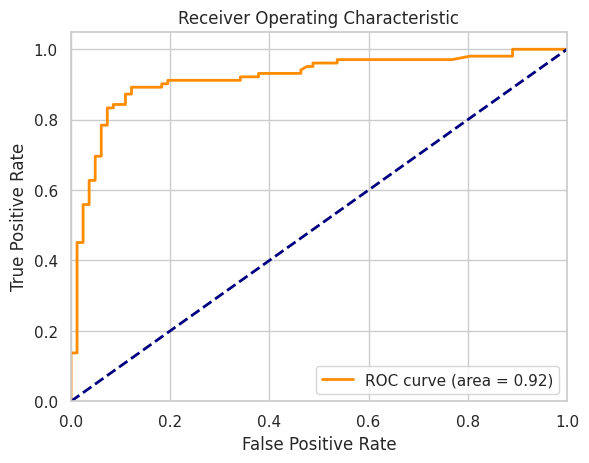

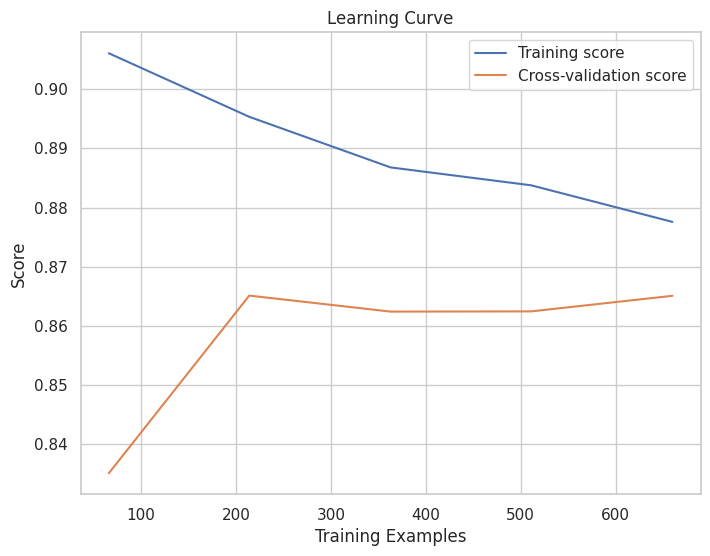

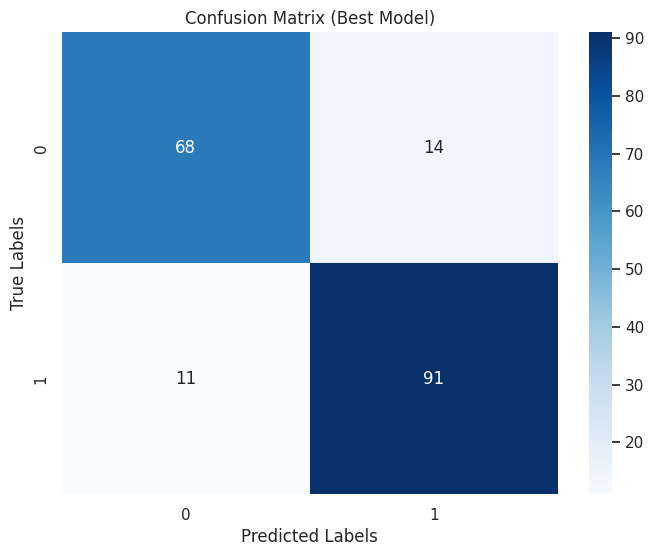

In [44]:
# Define a parameter grid for hyperparameter tuning
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [3, 5, 7, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 3, 5, 10],
    'criterion': ['gini', 'entropy']
}

# Initialize the RandomForest Classifier
RF = RandomForestClassifier(random_state=0)

# Initialize GridSearchCV
grid_search = GridSearchCV(RF, param_grid, cv=10, scoring='accuracy', n_jobs=-1)

# Perform hyperparameter tuning on the training data
grid_search.fit(x_train_new, y_train)

# Get the best hyperparameters
best_params = grid_search.best_params_

# Initialize RandomForest Classifier with best hyperparameters
best_RF = RandomForestClassifier(**best_params, random_state=0)

# Fit the model with best hyperparameters on the training data
best_RF.fit(x_train_new, y_train)

# Predictions using the best model
y_test_pred_RF = best_RF.predict(x_test_new)
y_train_pred_RF = best_RF.predict(x_train_new)

# Calculate accuracy scores using the best model
test_acc_RF = accuracy_score(y_test, y_test_pred_RF)
train_acc_RF = accuracy_score(y_train, y_train_pred_RF)

# Print the evaluation metrics for the best model
print("Best Hyperparameters: ", best_params)
print("Train set Accuracy (Best Model): ", train_acc_RF)
print("Test set Accuracy (Best Model): ", test_acc_RF)

# Calculate precision, recall, and F1-score for the best model
precision_score_RF = precision_score(y_test, y_test_pred_RF)
recall_score_RF = recall_score(y_test, y_test_pred_RF)
f1_score_RF = f1_score(y_test, y_test_pred_RF)

# Print precision, recall, and F1-score
print("Precision Score (Best Model): ", precision_score_RF)
print("Recall Score (Best Model): ", recall_score_RF)
print("F1-Score (Best Model): ", f1_score_RF)

# Compute ROC curve and ROC area for the best model
y_score_RF = best_RF.predict_proba(x_test_new)[:, 1]
fpr_RF, tpr_RF, _ = roc_curve(y_test, y_score_RF)
roc_auc_RF = auc(fpr_RF, tpr_RF)

# Print ROC AUC for the best model
print("ROC AUC (Best Model): ", roc_auc_RF)

# Print the classification report for the best model
print("\nClassification Report (Best Model):\n%s\n" % classification_report(y_test, y_test_pred_RF))

# Plot ROC curve for the best model
plt.figure()
plt.plot(fpr_RF, tpr_RF, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc_RF)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

# Plot the learning curve for the best model
plt.figure(figsize=(8, 6))
train_sizes, train_scores, test_scores = learning_curve(best_RF, x_train_new, y_train, cv=10, scoring='accuracy')
train_scores_mean = train_scores.mean(axis=1)
test_scores_mean = test_scores.mean(axis=1)
plt.plot(train_sizes, train_scores_mean, label='Training score')
plt.plot(train_sizes, test_scores_mean, label='Cross-validation score')
plt.xlabel("Training Examples")
plt.ylabel("Score")
plt.title("Learning Curve")
plt.legend()
plt.show()

# Plot the confusion matrix for the best model
plt.figure(figsize=(8, 6))
conf_RF = confusion_matrix(y_test, y_test_pred_RF)
sns.heatmap(conf_RF, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix (Best Model)")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()

### Gradient Boosting Classifier

Gradient Boosting Classifier is a machine learning algorithm that builds an ensemble of decision trees sequentially. It focuses on correcting the errors of previous trees, leading to improved predictive performance. It combines weak learners into a strong learner by assigning more weight to misclassified instances. Through iterations, it creates a powerful model while addressing issues like overfitting, making it popular for various classification tasks.

Best Hyperparameters:  {'learning_rate': 0.1, 'max_depth': 3, 'min_samples_leaf': 3, 'min_samples_split': 10, 'n_estimators': 50}
Train set Accuracy (Best Model):  0.9059945504087193
Test set Accuracy (Best Model):  0.8695652173913043
Precision Score (Best Model):  0.8979591836734694
Recall Score (Best Model):  0.8627450980392157
F1-Score (Best Model):  0.8799999999999999
ROC AUC (Best Model):  0.9247967479674797

Classification Report (Best Model):
              precision    recall  f1-score   support

           0       0.84      0.88      0.86        82
           1       0.90      0.86      0.88       102

    accuracy                           0.87       184
   macro avg       0.87      0.87      0.87       184
weighted avg       0.87      0.87      0.87       184




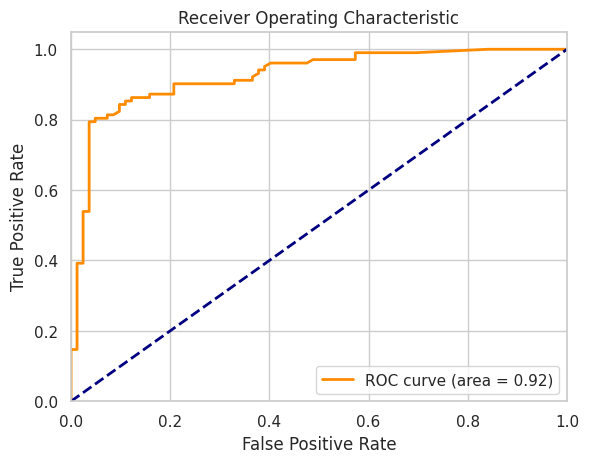

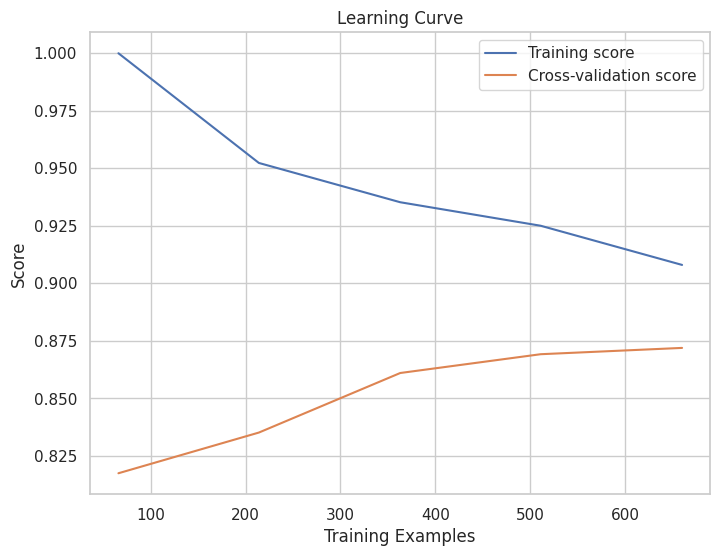

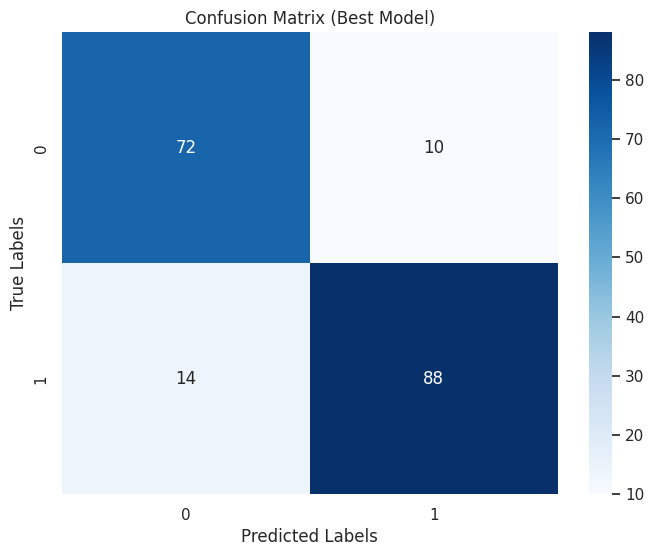

In [45]:
#Define a parameter grid for hyperparameter tuning
param_grid = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 5, 7],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 3, 5, 10]
}

# Initialize the Gradient Boosting Classifier
GB = GradientBoostingClassifier(random_state=0)

# Initialize GridSearchCV
grid_search = GridSearchCV(GB, param_grid, cv=10, scoring='accuracy', n_jobs=-1)

# Perform hyperparameter tuning on the training data
grid_search.fit(x_train_new, y_train)

# Get the best hyperparameters
best_params = grid_search.best_params_

# Initialize Gradient Boosting Classifier with best hyperparameters
best_GB = GradientBoostingClassifier(**best_params, random_state=0)

# Fit the model with best hyperparameters on the training data
best_GB.fit(x_train_new, y_train)

# Predictions using the best model
y_test_pred_GB = best_GB.predict(x_test_new)
y_train_pred_GB = best_GB.predict(x_train_new)

# Calculate accuracy scores using the best model
test_acc_GB = accuracy_score(y_test, y_test_pred_GB)
train_acc_GB = accuracy_score(y_train, y_train_pred_GB)

# Print the evaluation metrics for the best model
print("Best Hyperparameters: ", best_params)
print("Train set Accuracy (Best Model): ", train_acc_GB)
print("Test set Accuracy (Best Model): ", test_acc_GB)

# Calculate precision, recall, and F1-score for the best model
precision_score_GB = precision_score(y_test, y_test_pred_GB)
recall_score_GB = recall_score(y_test, y_test_pred_GB)
f1_score_GB = f1_score(y_test, y_test_pred_GB)

# Print precision, recall, and F1-score
print("Precision Score (Best Model): ", precision_score_GB)
print("Recall Score (Best Model): ", recall_score_GB)
print("F1-Score (Best Model): ", f1_score_GB)

# Compute ROC curve and ROC area for the best model
y_score_GB = best_GB.decision_function(x_test_new)
fpr_GB, tpr_GB, _ = roc_curve(y_test, y_score_GB)
roc_auc_GB = auc(fpr_GB, tpr_GB)

# Print ROC AUC for the best model
print("ROC AUC (Best Model): ", roc_auc_GB)

# Print the classification report for the best model
print("\nClassification Report (Best Model):\n%s\n" % classification_report(y_test, y_test_pred_GB))

# Plot ROC curve for the best model
plt.figure()
plt.plot(fpr_GB, tpr_GB, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc_GB)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

# Plot the learning curve for the best model
plt.figure(figsize=(8, 6))
train_sizes, train_scores, test_scores = learning_curve(best_GB, x_train_new, y_train, cv=10, scoring='accuracy')
train_scores_mean = train_scores.mean(axis=1)
test_scores_mean = test_scores.mean(axis=1)
plt.plot(train_sizes, train_scores_mean, label='Training score')
plt.plot(train_sizes, test_scores_mean, label='Cross-validation score')
plt.xlabel("Training Examples")
plt.ylabel("Score")
plt.title("Learning Curve")
plt.legend()
plt.show()

# Plot the confusion matrix for the best model
plt.figure(figsize=(8, 6))
conf_GB = confusion_matrix(y_test, y_test_pred_GB)
sns.heatmap(conf_GB, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix (Best Model)")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()

### Logistic Regression

Logistic Regression is a popular binary classification algorithm in machine learning. It models the relationship between input features and a binary target variable using the logistic function, producing probabilities that an instance belongs to a particular class. By applying a threshold, these probabilities can be used for classification. It's interpretable, efficient, and commonly used for tasks like spam detection, medical diagnosis, and sentiment analysis. Regularization techniques like L1 and L2 can be applied to prevent overfitting.

Best Hyperparameters:  {'C': 10, 'penalty': 'l1', 'solver': 'liblinear'}
Train set Accuracy (Best Model):  0.8501362397820164
Test set Accuracy (Best Model):  0.8478260869565217
Precision Score (Best Model):  0.87
Recall Score (Best Model):  0.8529411764705882
F1-Score (Best Model):  0.8613861386138614
ROC AUC (Best Model):  0.9050095648015303

Classification Report (Best Model):
              precision    recall  f1-score   support

           0       0.82      0.84      0.83        82
           1       0.87      0.85      0.86       102

    accuracy                           0.85       184
   macro avg       0.85      0.85      0.85       184
weighted avg       0.85      0.85      0.85       184




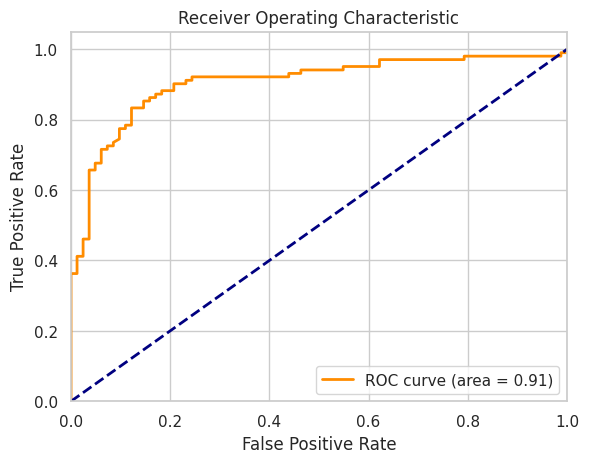

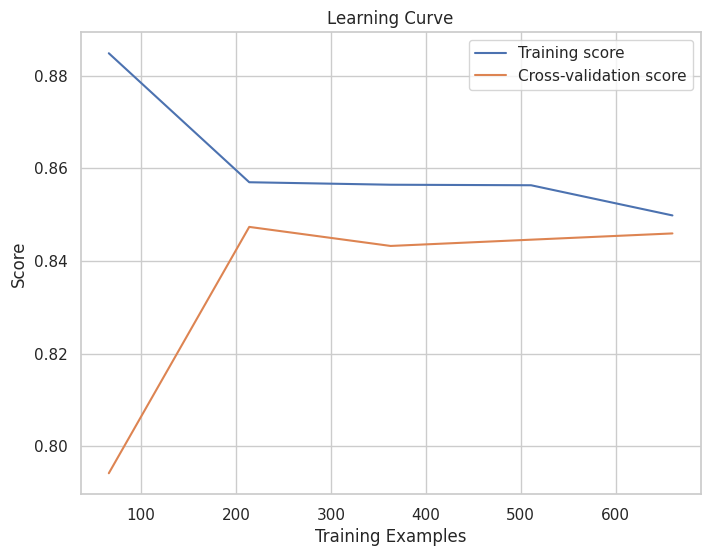

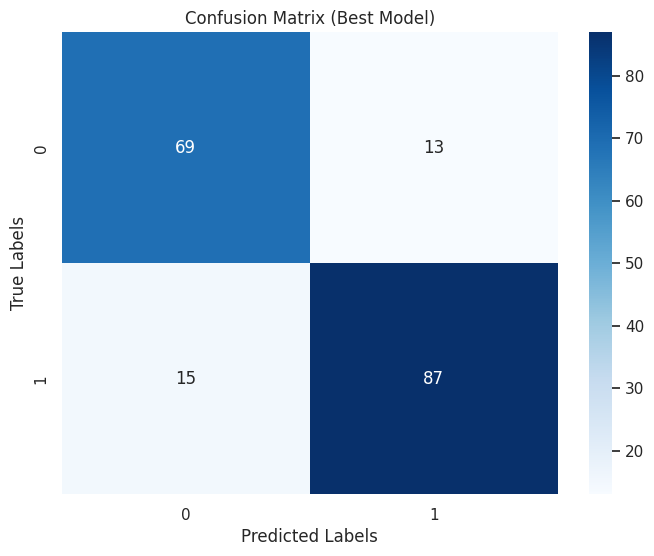

In [46]:
# Define a parameter grid for hyperparameter tuning
param_grid = {
    'C': [0.01, 0.1, 1, 10],
    'penalty': ['l1', 'l2'],
    'solver': ['liblinear', 'saga']
}

# Initialize the Logistic Regression Classifier
LR = LogisticRegression(random_state=0)

# Initialize GridSearchCV
grid_search = GridSearchCV(LR, param_grid, cv=10, scoring='accuracy', n_jobs=-1)

# Perform hyperparameter tuning on the training data
grid_search.fit(x_train_new, y_train)

# Get the best hyperparameters
best_params = grid_search.best_params_

# Initialize Logistic Regression Classifier with best hyperparameters
best_LR = LogisticRegression(**best_params, random_state=0)

# Fit the model with best hyperparameters on the training data
best_LR.fit(x_train_new, y_train)

# Predictions using the best model
y_test_pred_LR = best_LR.predict(x_test_new)
y_train_pred_LR = best_LR.predict(x_train_new)

# Calculate accuracy scores using the best model
test_acc_LR = accuracy_score(y_test, y_test_pred_LR)
train_acc_LR = accuracy_score(y_train, y_train_pred_LR)

# Print the evaluation metrics for the best model
print("Best Hyperparameters: ", best_params)
print("Train set Accuracy (Best Model): ", train_acc_LR)
print("Test set Accuracy (Best Model): ", test_acc_LR)

# Calculate precision, recall, and F1-score for the best model
precision_score_LR = precision_score(y_test, y_test_pred_LR)
recall_score_LR = recall_score(y_test, y_test_pred_LR)
f1_score_LR = f1_score(y_test, y_test_pred_LR)

# Print precision, recall, and F1-score
print("Precision Score (Best Model): ", precision_score_LR)
print("Recall Score (Best Model): ", recall_score_LR)
print("F1-Score (Best Model): ", f1_score_LR)

# Compute ROC curve and ROC area for the best model
y_score_LR = best_LR.predict_proba(x_test_new)[:, 1]
fpr_LR, tpr_LR, _ = roc_curve(y_test, y_score_LR)
roc_auc_LR = auc(fpr_LR, tpr_LR)

# Print ROC AUC for the best model
print("ROC AUC (Best Model): ", roc_auc_LR)

# Print the classification report for the best model
print("\nClassification Report (Best Model):\n%s\n" % classification_report(y_test, y_test_pred_LR))

# Plot ROC curve for the best model
plt.figure()
plt.plot(fpr_LR, tpr_LR, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc_LR)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

# Plot the learning curve for the best model
plt.figure(figsize=(8, 6))
train_sizes, train_scores, test_scores = learning_curve(best_LR, x_train_new, y_train, cv=10, scoring='accuracy')
train_scores_mean = train_scores.mean(axis=1)
test_scores_mean = test_scores.mean(axis=1)
plt.plot(train_sizes, train_scores_mean, label='Training score')
plt.plot(train_sizes, test_scores_mean, label='Cross-validation score')
plt.xlabel("Training Examples")
plt.ylabel("Score")
plt.title("Learning Curve")
plt.legend()
plt.show()

# Plot the confusion matrix for the best model
plt.figure(figsize=(8, 6))
conf_LR = confusion_matrix(y_test, y_test_pred_LR)
sns.heatmap(conf_LR, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix (Best Model)")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()

### KNeighbors Classifier

The KNeighbors Classifier is a supervised machine learning algorithm used for classification tasks. It works by finding the k nearest data points in the training set to a given input, based on a distance metric. The majority class among these neighbors determines the predicted class of the input. KNeighbors Classifier is intuitive, doesn't require explicit training, and can handle complex decision boundaries, but its effectiveness depends on the choice of 'k' and the nature of the data.

Best Hyperparameters:  {'n_neighbors': 3, 'p': 1, 'weights': 'uniform'}
Train set Accuracy (Best Model):  0.9032697547683923
Test set Accuracy (Best Model):  0.8260869565217391
Precision Score (Best Model):  0.8645833333333334
Recall Score (Best Model):  0.8137254901960784
F1-Score (Best Model):  0.8383838383838385
ROC AUC (Best Model):  0.8758369201339072

Classification Report (Best Model):
              precision    recall  f1-score   support

           0       0.78      0.84      0.81        82
           1       0.86      0.81      0.84       102

    accuracy                           0.83       184
   macro avg       0.82      0.83      0.83       184
weighted avg       0.83      0.83      0.83       184




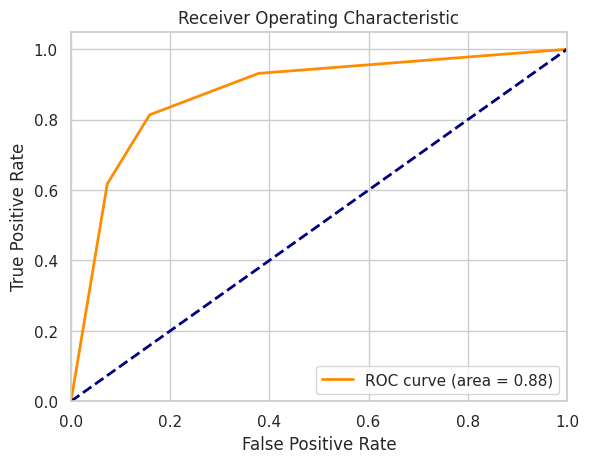

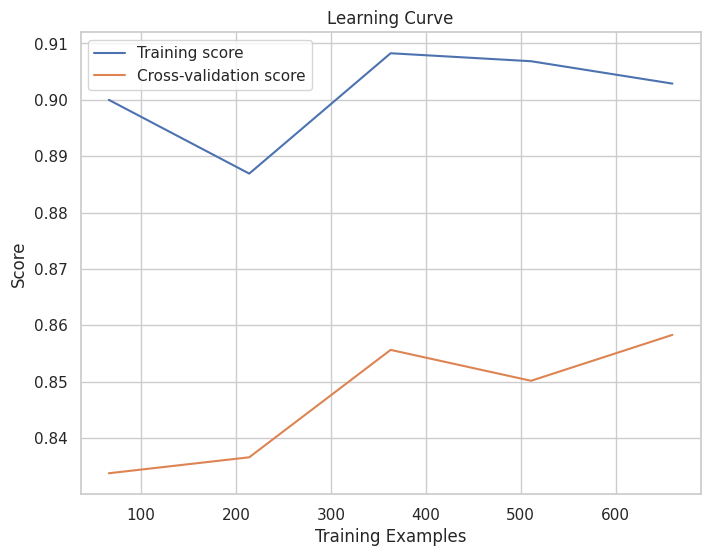

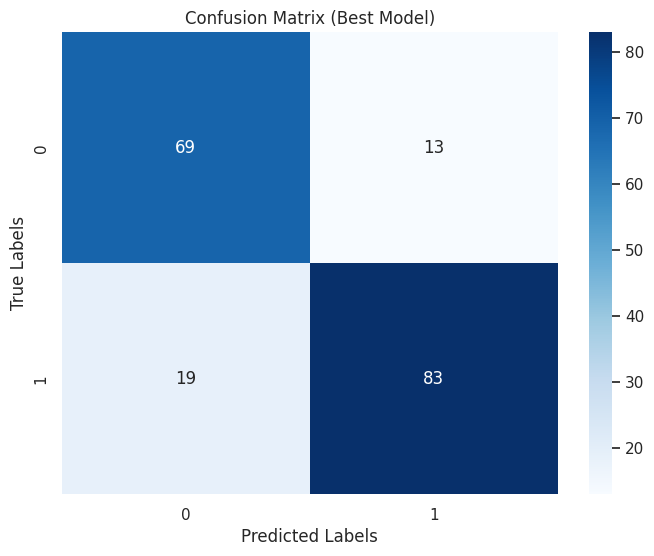

In [47]:
# Define a parameter grid for hyperparameter tuning
param_grid = {
    'n_neighbors': [3, 5, 7, 9],
    'weights': ['uniform', 'distance'],
    'p': [1, 2]
}

# Initialize the K-Nearest Neighbors Classifier
KNN = KNeighborsClassifier()

# Initialize GridSearchCV
grid_search = GridSearchCV(KNN, param_grid, cv=10, scoring='accuracy', n_jobs=-1)

# Perform hyperparameter tuning on the training data
grid_search.fit(x_train_new, y_train)

# Get the best hyperparameters
best_params = grid_search.best_params_

# Initialize K-Nearest Neighbors Classifier with best hyperparameters
best_KNN = KNeighborsClassifier(**best_params)

# Fit the model with best hyperparameters on the training data
best_KNN.fit(x_train_new, y_train)

# Predictions using the best model
y_test_pred_KNN = best_KNN.predict(x_test_new)
y_train_pred_KNN = best_KNN.predict(x_train_new)

# Calculate accuracy scores using the best model
test_acc_KNN = accuracy_score(y_test, y_test_pred_KNN)
train_acc_KNN = accuracy_score(y_train, y_train_pred_KNN)

# Print the evaluation metrics for the best model
print("Best Hyperparameters: ", best_params)
print("Train set Accuracy (Best Model): ", train_acc_KNN)
print("Test set Accuracy (Best Model): ", test_acc_KNN)

# Calculate precision, recall, and F1-score for the best model
precision_score_KNN = precision_score(y_test, y_test_pred_KNN)
recall_score_KNN = recall_score(y_test, y_test_pred_KNN)
f1_score_KNN = f1_score(y_test, y_test_pred_KNN)

# Print precision, recall, and F1-score
print("Precision Score (Best Model): ", precision_score_KNN)
print("Recall Score (Best Model): ", recall_score_KNN)
print("F1-Score (Best Model): ", f1_score_KNN)

# Compute ROC curve and ROC area for the best model
y_score_KNN = best_KNN.predict_proba(x_test_new)[:, 1]
fpr_KNN, tpr_KNN, _ = roc_curve(y_test, y_score_KNN)
roc_auc_KNN = auc(fpr_KNN, tpr_KNN)

# Print ROC AUC for the best model
print("ROC AUC (Best Model): ", roc_auc_KNN)

# Print the classification report for the best model
print("\nClassification Report (Best Model):\n%s\n" % classification_report(y_test, y_test_pred_KNN))

# Plot ROC curve for the best model
plt.figure()
plt.plot(fpr_KNN, tpr_KNN, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc_KNN)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

# Plot the learning curve for the best model
plt.figure(figsize=(8, 6))
train_sizes, train_scores, test_scores = learning_curve(best_KNN, x_train_new, y_train, cv=10, scoring='accuracy')
train_scores_mean = train_scores.mean(axis=1)
test_scores_mean = test_scores.mean(axis=1)
plt.plot(train_sizes, train_scores_mean, label='Training score')
plt.plot(train_sizes, test_scores_mean, label='Cross-validation score')
plt.xlabel("Training Examples")
plt.ylabel("Score")
plt.title("Learning Curve")
plt.legend()
plt.show()

# Plot the confusion matrix for the best model
plt.figure(figsize=(8, 6))
conf_KNN = confusion_matrix(y_test, y_test_pred_KNN)
sns.heatmap(conf_KNN, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix (Best Model)")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()

### XGBoost

XGBoost (Extreme Gradient Boosting) is a powerful supervised machine learning algorithm primarily used for regression and classification tasks. It operates by sequentially building a series of decision trees, each correcting the errors of its predecessors, thus creating a strong ensemble model. XGBoost is renowned for its efficiency, scalability, and exceptional performance in a wide range of applications. It incorporates regularization techniques to prevent overfitting, handles missing data efficiently, and provides native support for parallel processing. However, fine-tuning hyperparameters is crucial for optimal performance, and its interpretability may be challenging compared to simpler models.

Best Hyperparameters:  {'subsample': 1.0, 'reg_lambda': 2, 'reg_alpha': 0.5, 'n_estimators': 100, 'min_child_weight': 1, 'max_depth': 3, 'learning_rate': 0.1, 'gamma': 0, 'colsample_bytree': 0.8}
Train set Accuracy (Best Model):  0.9019073569482289
Test set Accuracy (Best Model):  0.8695652173913043
Precision Score (Best Model):  0.90625
Recall Score (Best Model):  0.8529411764705882
F1-Score (Best Model):  0.8787878787878787
ROC AUC (Best Model):  0.919894787183166

Classification Report (Best Model):
              precision    recall  f1-score   support

           0       0.83      0.89      0.86        82
           1       0.91      0.85      0.88       102

    accuracy                           0.87       184
   macro avg       0.87      0.87      0.87       184
weighted avg       0.87      0.87      0.87       184




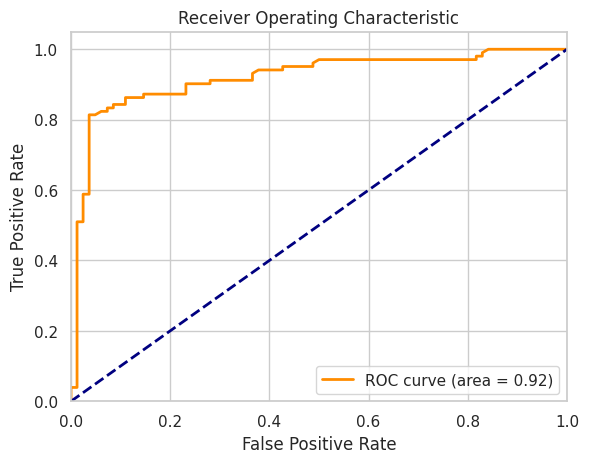

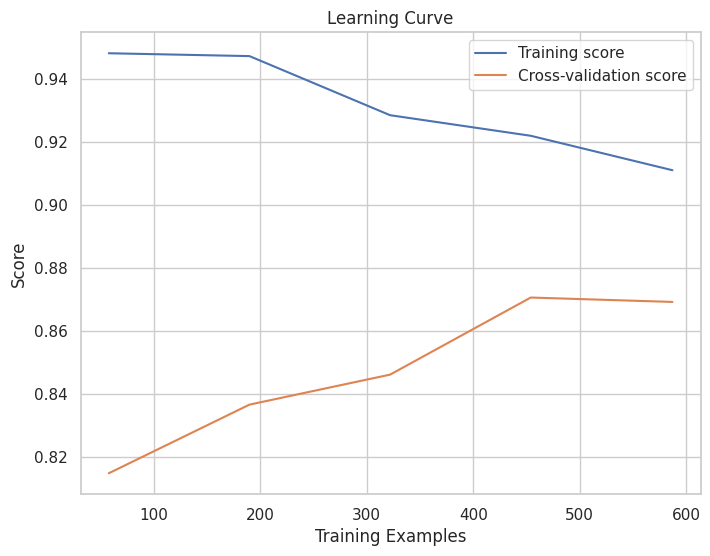

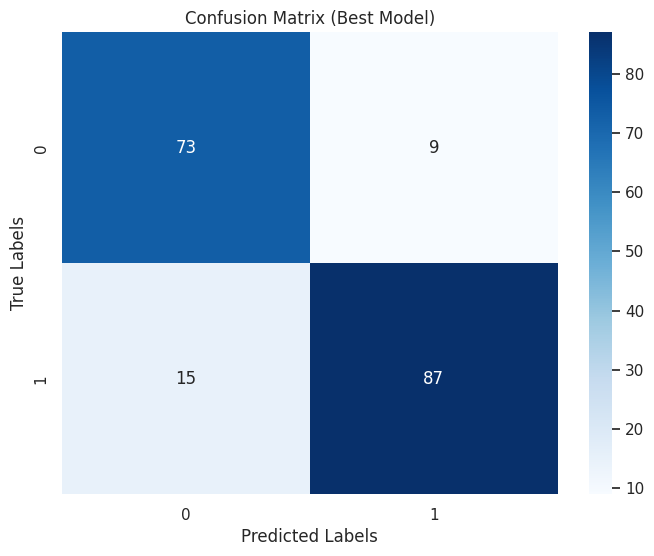

In [48]:
import xgboost as xgb
from sklearn.model_selection import RandomizedSearchCV, learning_curve
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_curve, auc, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Define a reduced parameter grid for hyperparameter tuning
param_grid = {
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.1],
    'n_estimators': [100, 200],
    'min_child_weight': [1, 5],
    'gamma': [0, 0.2],
    'subsample': [0.8, 1.0],
    'colsample_bytree': [0.8, 1.0],
    'reg_alpha': [0, 0.5],
    'reg_lambda': [1, 2]
}

# Initialize the XGBoost Classifier
xgb_model = xgb.XGBClassifier(objective='binary:logistic', random_state=0)

# Initialize RandomizedSearchCV with reduced parameter grid
random_search = RandomizedSearchCV(xgb_model, param_distributions=param_grid, n_iter=50, cv=5, scoring='accuracy', n_jobs=-1, random_state=0)

# Perform hyperparameter tuning on the training data
random_search.fit(x_train_new, y_train)

# Get the best hyperparameters
best_params = random_search.best_params_

# Initialize XGBoost Classifier with best hyperparameters
best_xgb_model = xgb.XGBClassifier(**best_params, objective='binary:logistic', random_state=0)

# Fit the model with best hyperparameters on the training data
best_xgb_model.fit(x_train_new, y_train)

# Predictions using the best model
y_test_pred_xgb = best_xgb_model.predict(x_test_new)
y_train_pred_xgb = best_xgb_model.predict(x_train_new)

# Calculate accuracy scores using the best model
test_acc_xgb = accuracy_score(y_test, y_test_pred_xgb)
train_acc_xgb = accuracy_score(y_train, y_train_pred_xgb)

# Print the evaluation metrics for the best model
print("Best Hyperparameters: ", best_params)
print("Train set Accuracy (Best Model): ", train_acc_xgb)
print("Test set Accuracy (Best Model): ", test_acc_xgb)

# Calculate precision, recall, and F1-score for the best model
precision_score_xgb = precision_score(y_test, y_test_pred_xgb)
recall_score_xgb = recall_score(y_test, y_test_pred_xgb)
f1_score_xgb = f1_score(y_test, y_test_pred_xgb)

# Print precision, recall, and F1-score
print("Precision Score (Best Model): ", precision_score_xgb)
print("Recall Score (Best Model): ", recall_score_xgb)
print("F1-Score (Best Model): ", f1_score_xgb)

# Compute ROC curve and ROC area for the best model
y_score_xgb = best_xgb_model.predict_proba(x_test_new)[:, 1]
fpr_xgb, tpr_xgb, _ = roc_curve(y_test, y_score_xgb)
roc_auc_xgb = auc(fpr_xgb, tpr_xgb)

# Print ROC AUC for the best model
print("ROC AUC (Best Model): ", roc_auc_xgb)

# Print the classification report for the best model
print("\nClassification Report (Best Model):\n%s\n" % classification_report(y_test, y_test_pred_xgb))

# Plot ROC curve for the best model
plt.figure()
plt.plot(fpr_xgb, tpr_xgb, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc_xgb)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

# Plot the learning curve for the best model
plt.figure(figsize=(8, 6))
train_sizes, train_scores, test_scores = learning_curve(best_xgb_model, x_train_new, y_train, cv=5, scoring='accuracy', n_jobs=-1)
train_scores_mean = train_scores.mean(axis=1)
test_scores_mean = test_scores.mean(axis=1)
plt.plot(train_sizes, train_scores_mean, label='Training score')
plt.plot(train_sizes, test_scores_mean, label='Cross-validation score')
plt.xlabel("Training Examples")
plt.ylabel("Score")
plt.title("Learning Curve")
plt.legend()
plt.show()

# Plot the confusion matrix for the best model
plt.figure(figsize=(8, 6))
conf_xgb = confusion_matrix(y_test, y_test_pred_xgb)
sns.heatmap(conf_xgb, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix (Best Model)")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()

## Model Comparision

In [49]:
##  Saving the values of all the model to a list of tuples containing the names and model name

models = []
models.append(('DT', DT))
models.append(('RF', RF))
models.append(('LR', LR))
models.append(('KNN', KNN))
models.append(('GB', GB))
models.append(('xgb_model', xgb_model))
# Initialize lists to store results and names
results = []
names = []
# Loop through each model
for name, model in models:
# Set up cross-validation with 10 folds
    kfold = KFold(n_splits=10, random_state=100, shuffle=True)
    # Perform cross-validation and store results
    cv_results = cross_val_score(model, x_train_new, y_train, cv=kfold, scoring='accuracy')
    results.append(cv_results)
    names.append(name)
    # Print mean and standard deviation of cross-validation results
    score = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(score)

DT: 0.809182 (0.053022)
RF: 0.848852 (0.061557)
LR: 0.837875 (0.031873)
KNN: 0.846113 (0.044845)
GB: 0.862403 (0.048294)
xgb_model: 0.833821 (0.053719)


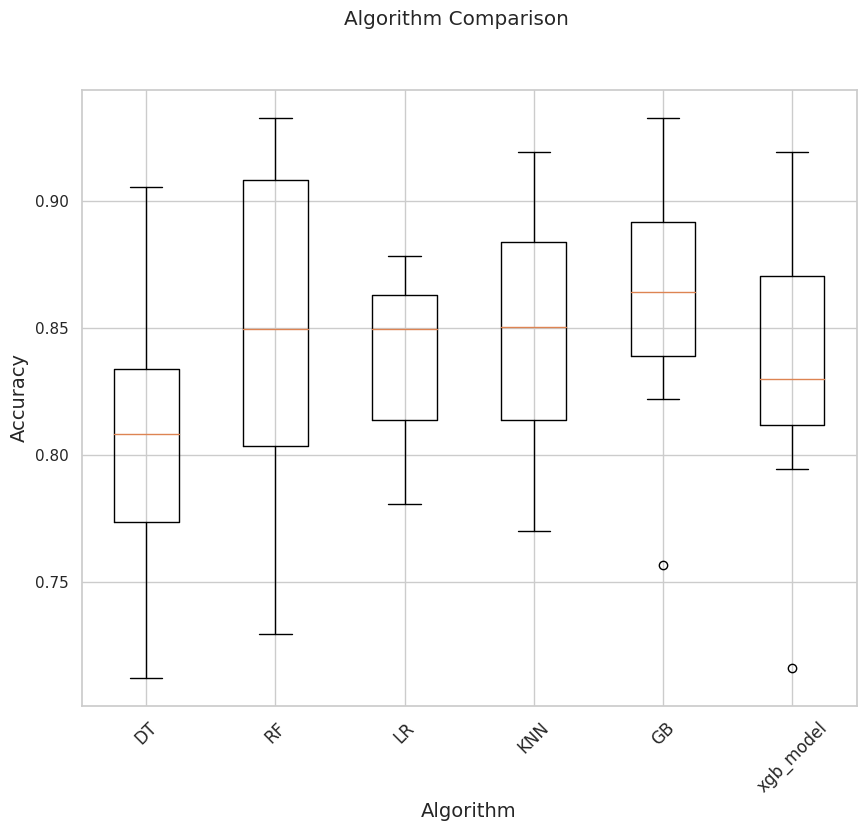

In [50]:
# Create a box plot of algorithm comparison
fig = plt.figure(figsize=(10,8))
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
ax.set_xticklabels(names, rotation=45, fontsize=12)
plt.xlabel('Algorithm', fontsize=14)
plt.ylabel('Accuracy', fontsize=14)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

In [51]:
# Create a list of tuples to store comparison metrics for different models
compare_models = [
    # (Model Name, Train Accuracy, Test Accuracy,
    # Precision Score, Recall Score, F1 Score)
    ('Decision Tree', train_acc_DT, test_acc_DT, precision_score_DT, recall_score_DT, f1_score_DT),
    ('Random Forest', train_acc_RF, test_acc_RF, precision_score_RF, recall_score_RF, f1_score_RF ),
    ('GradientBoosting', train_acc_GB, test_acc_GB, precision_score_GB, recall_score_GB, f1_score_GB),
    ('Logistic Regression', train_acc_LR, test_acc_LR, precision_score_LR, recall_score_LR, f1_score_LR),
    ('KNN', train_acc_KNN, test_acc_KNN, precision_score_KNN, recall_score_KNN, f1_score_KNN),
    ('XGBoost', train_acc_xgb, test_acc_xgb, precision_score_xgb, recall_score_xgb, f1_score_xgb)
]

In [52]:
# Create a DataFrame from the compare_models list
predict = pd.DataFrame(data=compare_models, columns=['Model', 'Train_accuracy', 'Test_accuracy', 'precision_score', 'recall_score', 'f1_score'])
predict.style.background_gradient(cmap='RdPu')

#### The criterion for selecting the final model

Based on these metrics, the "best" model can depend on the specific criteria you prioritize. Here are a few considerations based on common criteria:

•	Test Accuracy: Gradient Boosting achieved the highest test accuracy of 0.869565.

•	Precision and Recall Balance: Decision Tree showed a high precision score of 0.932584, while Random Forest exhibited a high recall score of 0.892157.

•	Overall Balance: Gradient Boosting demonstrated a good balance between precision (0.897959) and recall (0.862745) with a relatively high F1 score of 0.880000. Thus, prioritizing overall performance considering both precision and recall, Gradient Boosting appears to be the best model among those listed.



## Conclusion

In conclusion, our project on "Heart Failure Prediction & Analytics" represents a comprehensive endeavor to leverage data science and machine learning techniques to address a critical healthcare challenge. Through extensive data collection, preprocessing, and exploratory data analysis, we gained valuable insights into the factors influencing heart failure and the complexities of the dataset.

By implementing six different classifiers, including Decision Tree, Random Forest, Gradient Boosting Classifier, Logistic Regression, K-Nearest Neighbors, and XG Boost, we conducted a thorough evaluation of model performance. This comparative analysis enabled us to identify the most effective algorithms for predicting heart failure likelihood, thereby facilitating early intervention and personalized treatment strategies.

Our deep understanding of the problem domain underscores the significance of our solution in improving patient outcomes and healthcare delivery. By harnessing the power of data science, we aim to empower healthcare professionals with accurate predictive models and actionable insights, ultimately contributing to the advancement of cardiac care and patient well-being.

Moving forward, continuous refinement of our models and integration of new data sources will be essential for enhancing predictive accuracy and scalability. Additionally, addressing ethical considerations such as data privacy and bias mitigation remains paramount in the development and deployment of healthcare-focused machine learning solutions.

In essence, our project exemplifies the transformative potential of data science in healthcare, paving the way for innovative approaches to disease prediction, prevention, and personalized patient care.